#Laboratorio Modelos Probabilísticos Predictivos
__Escuela Tecnológica Instituto Técnico Central__\
__Ingeniería de Sistemas__\
***Electiva  Técnica IV: Ciencia de Datos*** \
*Profesor: Elias Buitrago Bolivar* \

En este laboratorio se exploran tres métodos que permiten generar modelos predictivos. Los tres métodos se circunscriben en un marco de trabajo probabilístico. Es decir, tienen en común que incorporan la teoría de la probabilidad en sus enfoques de modelado y predicción. Estos modelos predictivos probabilísticos pueden dar una gama de posibles valores con diferentes niveles de probabilidad asociados a cada uno. Esto significa que no solo obtienes una estimación puntual, sino también una idea de qué tan segura es esa estimación y qué tan probable es que otros valores también sean posibles. Esto es muy útil en situaciones donde la certeza de la predicción es importante y puede influir en la toma de decisiones críticas. Los métodos comparados en este laboratorio son los siguientes:
* *Regresión Lineal Probabilística* (PLR): modela la incertidumbre en las predicciones mediante la estimación de distribuciones de probabilidad para las salidas.
* *Regresión Logística Bayesiana* (BLR): basado en la teoría bayesiana para estimar la probabilidad de pertenencia a una clase en problemas de clasificación.
* *Árboles de Decisión Probabilísticos* (PDT), utilizan la asignación de distribuciones de probabilidad a las ramas del árbol.




## Introducción

## Caso de estudio \#1: Modelo Predictivo Precio de Vehículo Usados

### Usando los siguientes modelos:
1. Regresión Lineal
2. Árboles de Decisión
3. Maquinás de Vectores de Soportes para Regesión

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos
# url = "https://raw.githubusercontent.com/ebuitrago/ETITC_DataScience_Electives/main/data/usedCarsCol_190224_small2Clean.csv"
# url = "https://raw.githubusercontent.com/ebuitrago/ETITC_DataScience_Electives/main/data/usedCarsCol_rio_120324_small.csv"
url = "https://raw.githubusercontent.com/ebuitrago/ETITC_DataScience_Electives/main/data/usedCarsCol_onix_120324.csv"
data = pd.read_csv(url)

In [ ]:
data['price'] = data['price'].astype(str)
data['price'] = data['price'].str.replace(r'\D', '').astype(int)

<ipython-input-36-d7a66c422863>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = data['price'].str.replace(r'\D', '').astype(int)


In [ ]:
data.head()

,car_model,price,year_model,kms
0,Chevrolet Onix 1.0t Automática,57900000,2021,38500
1,Chevrolet Onix 1.4 Lt,49000000,2021,42000
2,Chevrolet Onix Lt 1.0,55900000,2021,38000
3,Chevrolet Onix 1.4 Ltz Aut,46000000,2019,56000
4,Chevrolet Onix 1.4 Ltz,43000000,2016,47096


In [ ]:
data.dtypes

car_model     object
price          int64
year_model     int64
kms            int64
dtype: object

In [ ]:
# Eliminar la variable 'car_model'
data = data.drop(columns=['car_model'])

# Eliminar filas con valores faltantes en la columna 'price'
data = data.dropna(subset=['price'])

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['price'])
y = data['price']

In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Definir y entrenar modelos
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_svr = SVR()

model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_svr.fit(X_train, y_train)

# Generar predicciones
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_svr = model_svr.predict(X_test)

In [ ]:
# Calcular métricas de desempeño
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_svr = r2_score(y_test, y_pred_svr)

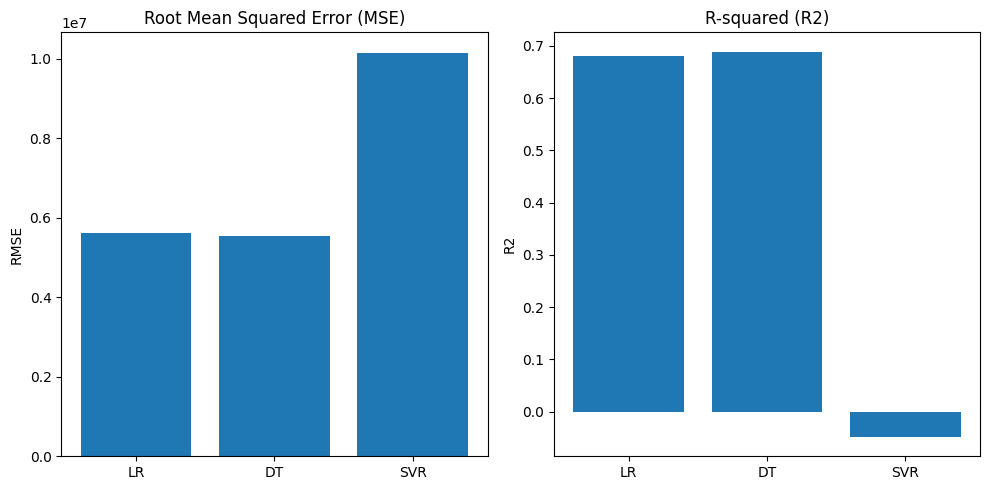

RMSE:
LR: 5611685.27
DT: 5534455.33
SVR: 10161131.01

R2:
LR: 0.68
DT: 0.69
SVR: -0.05


In [ ]:
# Graficar resultados
labels = ['LR', 'DT', 'SVR']
rmse_scores = [rmse_lr, rmse_dt, rmse_svr]
r2_scores = [r2_lr, r2_dt, r2_svr]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, rmse_scores)
plt.title('Root Mean Squared Error (MSE)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(labels, r2_scores)
plt.title('R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

# Imprimir métricas de desempeño
print("RMSE:")
print("LR: %.2f" % rmse_lr)
print("DT: %.2f" % rmse_dt)
print("SVR: %.2f" % rmse_svr)

print("\nR2:")
print("LR: %.2f" % r2_lr)
print("DT: %.2f" % r2_dt)
print("SVR: %.2f" % r2_svr)

### Usando Modelos Probabilísticos:
1.  Regresión Lineal Probabilística (PLR)
2. Árboles de Decisión Probabilísticos (PDT)
3. Modelos de Regresión Bayesianos (BR)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

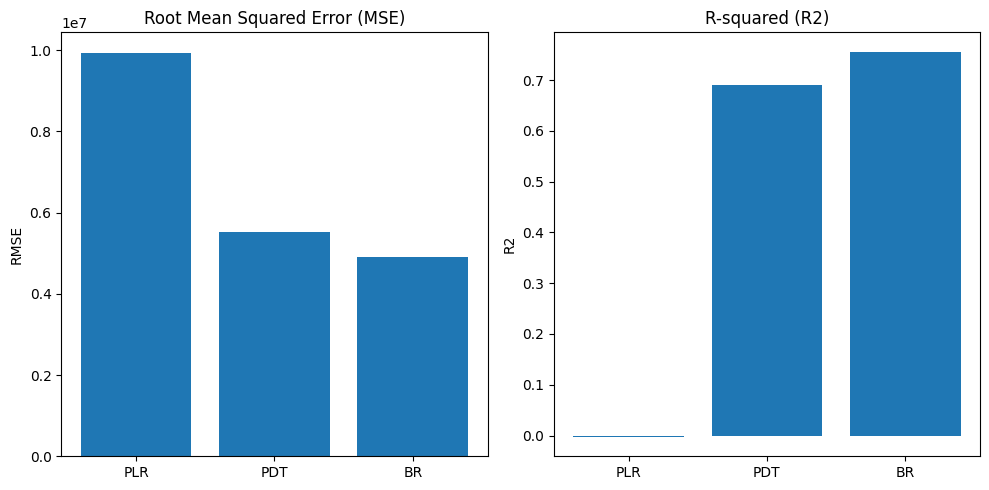

RMSE:
PLR: 9938111.50
PDT: 5531568.61
BR: 4902414.43

R2:
PLR: -0.00
PDT: 0.69
BR: 0.76


In [ ]:
# Inicializar y entrenar los modelos
model_plr = BayesianRidge()
model_pdt = DecisionTreeRegressor()
model_br = RandomForestRegressor()

model_plr.fit(X_train, y_train)
model_pdt.fit(X_train, y_train)
model_br.fit(X_train, y_train)

# Generar predicciones
y_pred_plr = model_plr.predict(X_test)
y_pred_pdt = model_pdt.predict(X_test)
y_pred_br = model_br.predict(X_test)

# Calcular métricas de desempeño
rmse_plr = mean_squared_error(y_test, y_pred_plr, squared=False)
rmse_pdt = mean_squared_error(y_test, y_pred_pdt, squared=False)
rmse_br = mean_squared_error(y_test, y_pred_br, squared=False)

r2_plr = r2_score(y_test, y_pred_plr)
r2_pdt = r2_score(y_test, y_pred_pdt)
r2_br = r2_score(y_test, y_pred_br)

# Graficar resultados
labels = ['PLR', 'PDT', 'BR']
rmse_scores = [rmse_plr, rmse_pdt, rmse_br]
r2_scores = [r2_plr, r2_pdt, r2_br]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(labels, rmse_scores)
plt.title('Root Mean Squared Error (MSE)')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(labels, r2_scores)
plt.title('R-squared (R2)')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

# Imprimir métricas de desempeño
print("RMSE:")
print("PLR: %.2f" % rmse_plr)
print("PDT: %.2f" % rmse_pdt)
print("BR: %.2f" % rmse_br)

print("\nR2:")
print("PLR: %.2f" % r2_plr)
print("PDT: %.2f" % r2_pdt)
print("BR: %.2f" % r2_br)


## Caso de estudio \#2: Predicción Precios Apartamentos Bogotá

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Cargar los datos
url = "https://raw.githubusercontent.com/ebuitrago/ETITC_DataScience_Electives/main/data/data_fincaraiz2023_clean.csv"
data = pd.read_csv(url)

# Eliminar filas con valores faltantes en la columna 'precio'
data = data.dropna(subset=['precio'])

# Separar características (X) y variable objetivo (y)
X = data.drop(columns=['precio'])
y = data['precio']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y entrenar los modelos
model_plr = BayesianRidge()
model_pdt = DecisionTreeRegressor()
model_br = RandomForestRegressor()

model_plr.fit(X_train, y_train)
model_pdt.fit(X_train, y_train)
model_br.fit(X_train, y_train)

# Generar predicciones
y_pred_plr = model_plr.predict(X_test)
y_pred_pdt = model_pdt.predict(X_test)
y_pred_br = model_br.predict(X_test)

In [ ]:

# Calcular métricas de desempeño
rmse_plr = mean_squared_error(y_test, y_pred_plr, squared=False)
rmse_pdt = mean_squared_error(y_test, y_pred_pdt, squared=False)
rmse_br = mean_squared_error(y_test, y_pred_br, squared=False)

r2_plr = r2_score(y_test, y_pred_plr)
r2_pdt = r2_score(y_test, y_pred_pdt)
r2_br = r2_score(y_test, y_pred_br)

# Imprimir métricas de desempeño
print("RMSE:")
print("PLR: %.2f" % rmse_plr)
print("PDT: %.2f" % rmse_pdt)
print("BR: %.2f" % rmse_br)

print("\nR2:")
print("PLR: %.2f" % r2_plr)
print("PDT: %.2f" % r2_pdt)
print("BR: %.2f" % r2_br)


RMSE:
PLR: 684181695.04
PDT: 206693313.50
BR: 125979202.84

R2:
PLR: -0.00
PDT: 0.91
BR: 0.97


## Optimización de hiperparámetros para el mejor modelo (PDT)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar el modelo PDT
model_pdt_opt = DecisionTreeRegressor(random_state=42)

# Realizar búsqueda de cuadrícula de hiperparámetros
grid_search = GridSearchCV(estimator=model_pdt_opt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Generar predicciones con el mejor modelo
preds = best_model.predict(X_test)

# Calcular métricas de desempeño
rmse = mean_squared_error(y_test, preds, squared=False)
r2 = r2_score(y_test, preds)

# Imprimir métricas de desempeño
print("\nRMSE con optimización de hiperparámetros:", rmse)
print("R2 con optimización de hiperparámetros:", r2)


Mejores hiperparámetros encontrados: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}

RMSE con optimización de hiperparámetros: 167950512.69498625
R2 con optimización de hiperparámetros: 0.9397269423643191


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
